In [1]:
# 📦 Importar librerías necesarias
import pandas as pd
import numpy as np

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# 📄 Cargar todos los datasets
print("Cargando datasets...")

# Load the sales data (tab-delimited)
sales = pd.read_csv("datasets/sell-in.txt", sep="\t", dtype={"periodo": str})
print(f"✅ Sales data cargado: {sales.shape}")

# Load the stocks data (tab-delimited) 
stocks = pd.read_csv("datasets/tb_stocks.txt", sep="\t", dtype={"periodo": str})
print(f"✅ Stocks data cargado: {stocks.shape}")

# Load the product information data (tab-delimited)
product_info = pd.read_csv("datasets/tb_productos.txt", sep="\t")
print(f"✅ Product info cargado: {product_info.shape}")

# Carga productos a predecir
product_predict = pd.read_csv("datasets/product_id_apredecir201912.txt", sep="\t", header=0)
print(f"✅ Productos a predecir cargados: {product_predict.shape}")

print("\n🎯 Todos los datasets cargados exitosamente")

Cargando datasets...
✅ Sales data cargado: (2945818, 7)
✅ Stocks data cargado: (13691, 3)
✅ Product info cargado: (1251, 7)
✅ Productos a predecir cargados: (780, 1)

🎯 Todos los datasets cargados exitosamente
✅ Sales data cargado: (2945818, 7)
✅ Stocks data cargado: (13691, 3)
✅ Product info cargado: (1251, 7)
✅ Productos a predecir cargados: (780, 1)

🎯 Todos los datasets cargados exitosamente


In [3]:
# 🔍 Explorar estructura de los datos
print("EXPLORACIÓN DE DATOS")
print("="*50)

print("\n📊 SALES DATA:")
print(f"Columnas: {list(sales.columns)}")
print(f"Períodos únicos: {sales['periodo'].nunique()}")
print(f"Productos únicos: {sales['product_id'].nunique()}")
print("Primeras filas:")
print(sales.head())

print("\n📦 STOCKS DATA:")
print(f"Columnas: {list(stocks.columns)}")
print(f"Períodos únicos: {stocks['periodo'].nunique()}")
print(f"Productos únicos: {stocks['product_id'].nunique()}")
print("Primeras filas:")
print(stocks.head())

print("\n🏷️ PRODUCT INFO:")
print(f"Columnas: {list(product_info.columns)}")
print(f"Productos únicos: {product_info['product_id'].nunique()}")
print("Primeras filas:")
print(product_info.head())

print("\n🎯 PRODUCTOS A PREDECIR:")
print(f"Columnas: {list(product_predict.columns)}")
print(f"Total productos a predecir: {len(product_predict)}")
print("Primeras filas:")
print(product_predict.head())

EXPLORACIÓN DE DATOS

📊 SALES DATA:
Columnas: ['periodo', 'customer_id', 'product_id', 'plan_precios_cuidados', 'cust_request_qty', 'cust_request_tn', 'tn']
Períodos únicos: 36
Productos únicos: 1233
Primeras filas:
  periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0  201701        10234       20524                      0                 2   
1  201701        10032       20524                      0                 1   
2  201701        10217       20524                      0                 1   
3  201701        10125       20524                      0                 1   
4  201701        10012       20524                      0                11   

   cust_request_tn       tn  
0          0.05300  0.05300  
1          0.13628  0.13628  
2          0.03028  0.03028  
3          0.02271  0.02271  
4          1.54452  1.54452  

📦 STOCKS DATA:
Columnas: ['periodo', 'product_id', 'stock_final']
Períodos únicos: 15
Productos únicos: 1095
Primeras filas:
  p

In [4]:
# 🔗 Verificar consistencia entre datasets
print("VERIFICACIÓN DE CONSISTENCIA")
print("="*50)

# Productos únicos en cada dataset
productos_sales = set(sales['product_id'].unique())
productos_stocks = set(stocks['product_id'].unique())
productos_info = set(product_info['product_id'].unique())

# Si product_predict tiene columna product_id
if 'product_id' in product_predict.columns:
    productos_predict = set(product_predict['product_id'].unique())
else:
    # Si la primera columna contiene los product_ids
    primera_columna = product_predict.columns[0]
    productos_predict = set(product_predict[primera_columna].unique())
    print(f"⚠️ Usando columna '{primera_columna}' como product_id")

print(f"📊 Productos en sales: {len(productos_sales)}")
print(f"📦 Productos en stocks: {len(productos_stocks)}")
print(f"🏷️ Productos en product_info: {len(productos_info)}")
print(f"🎯 Productos a predecir: {len(productos_predict)}")

# Verificar intersecciones
print(f"\n🔍 INTERSECCIONES:")
print(f"Sales ∩ Stocks: {len(productos_sales & productos_stocks)}")
print(f"Sales ∩ Product_info: {len(productos_sales & productos_info)}")
print(f"Sales ∩ Productos_predict: {len(productos_sales & productos_predict)}")
print(f"Stocks ∩ Productos_predict: {len(productos_stocks & productos_predict)}")
print(f"Product_info ∩ Productos_predict: {len(productos_info & productos_predict)}")

# Verificar rangos de fechas
print(f"\n📅 RANGOS DE FECHAS:")
print(f"Sales - períodos: {sales['periodo'].min()} a {sales['periodo'].max()}")
print(f"Stocks - períodos: {stocks['periodo'].min()} a {stocks['periodo'].max()}")

VERIFICACIÓN DE CONSISTENCIA
📊 Productos en sales: 1233
📦 Productos en stocks: 1095
🏷️ Productos en product_info: 1251
🎯 Productos a predecir: 780

🔍 INTERSECCIONES:
Sales ∩ Stocks: 1095
Sales ∩ Product_info: 1188
Sales ∩ Productos_predict: 780
Stocks ∩ Productos_predict: 779
Product_info ∩ Productos_predict: 780

📅 RANGOS DE FECHAS:
Sales - períodos: 201701 a 201912
Stocks - períodos: 201810 a 201912
Sales - períodos: 201701 a 201912
Stocks - períodos: 201810 a 201912


In [5]:
# 📦 Instalar e importar LightGBM, Optuna y librerías adicionales
# %pip install lightgbm optuna

import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✅ LightGBM, Optuna y librerías ML importadas correctamente")

✅ LightGBM, Optuna y librerías ML importadas correctamente


In [6]:
# 🧹 Preparación de datos para el modelo LightGBM
print("PREPARACIÓN DE DATOS PARA LGBM - GRANULARIDAD POR PRODUCTO")
print("="*60)

# Convertir período a datetime para facilitar manipulación
sales['fecha'] = pd.to_datetime(sales['periodo'], format='%Y%m')
stocks['fecha'] = pd.to_datetime(stocks['periodo'], format='%Y%m')

# Filtrar solo productos que necesitamos predecir
if 'product_id' in product_predict.columns:
    productos_objetivo = product_predict['product_id'].tolist()
else:
    productos_objetivo = product_predict[product_predict.columns[0]].tolist()

print(f"🎯 Productos objetivo: {len(productos_objetivo)}")

# Filtrar sales y stocks para productos objetivo
sales_filtered = sales[sales['product_id'].isin(productos_objetivo)].copy()
stocks_filtered = stocks[stocks['product_id'].isin(productos_objetivo)].copy()

print(f"📊 Sales filtradas: {sales_filtered.shape}")
print(f"📦 Stocks filtradas: {stocks_filtered.shape}")

# AGREGACIÓN POR PRODUCTO: Sumar por producto y período (agregando todos los clientes)
sales_agg = sales_filtered.groupby(['product_id', 'fecha', 'periodo']).agg({
    'tn': 'sum',                    # Total toneladas por producto
    'customer_id': 'nunique',       # Número de clientes únicos
    'cust_request_qty': 'sum',      # Total cantidad solicitada
    'cust_request_tn': 'sum'        # Total toneladas solicitadas
}).reset_index()

# Renombrar columnas para claridad
sales_agg.rename(columns={
    'customer_id': 'num_customers',
    'cust_request_qty': 'total_request_qty', 
    'cust_request_tn': 'total_request_tn'
}, inplace=True)

print(f"📈 Sales agregadas por producto: {sales_agg.shape}")
print("Primeras filas de sales agregadas:")
print(sales_agg.head())

print(f"\n📊 Estadísticas por producto:")
print(f"  Promedio tn por producto-período: {sales_agg['tn'].mean():.2f}")
print(f"  Promedio clientes por producto-período: {sales_agg['num_customers'].mean():.2f}")
print(f"  Productos únicos: {sales_agg['product_id'].nunique()}")
print(f"  Períodos únicos: {sales_agg['periodo'].nunique()}")

PREPARACIÓN DE DATOS PARA LGBM - GRANULARIDAD POR PRODUCTO
🎯 Productos objetivo: 780
📊 Sales filtradas: (2293481, 8)
📦 Stocks filtradas: (10727, 4)
📊 Sales filtradas: (2293481, 8)
📦 Stocks filtradas: (10727, 4)
📈 Sales agregadas por producto: (22349, 7)
Primeras filas de sales agregadas:
   product_id      fecha periodo          tn  num_customers  \
0       20001 2017-01-01  201701   934.77222            186   
1       20001 2017-02-01  201702   798.01620            185   
2       20001 2017-03-01  201703  1303.35771            188   
3       20001 2017-04-01  201704  1069.96130            104   
4       20001 2017-05-01  201705  1502.20132            238   

   total_request_qty  total_request_tn  
0                479         937.72717  
1                432         833.72187  
2                509        1330.74697  
3                279        1132.94430  
4                701        1550.68936  

📊 Estadísticas por producto:
  Promedio tn por producto-período: 50.23
  Promedio cli

In [7]:
# 🔧 Crear features de lag y combinar con stocks - GRANULARIDAD POR PRODUCTO
print("CREACIÓN DE FEATURES POR PRODUCTO")
print("="*50)

# Crear features de lag para cada producto
def create_lag_features(df, product_col, value_col, date_col, lags=[1, 2, 3, 6, 12]):
    """Crear features de lag para series temporales por producto"""
    df_features = df.copy()
    df_features = df_features.sort_values([product_col, date_col])
    
    for lag in lags:
        df_features[f'{value_col}_lag_{lag}'] = df_features.groupby(product_col)[value_col].shift(lag)
    
    return df_features

# Crear lags para ventas (tn) por producto
sales_with_lags = create_lag_features(
    sales_agg, 
    'product_id', 
    'tn', 
    'fecha', 
    lags=[1, 2, 3, 6, 12]
)

# Crear lags para número de clientes por producto
sales_with_lags = create_lag_features(
    sales_with_lags, 
    'product_id', 
    'num_customers', 
    'fecha', 
    lags=[1, 2, 3]
)

# Crear lags para solicitudes de clientes
sales_with_lags = create_lag_features(
    sales_with_lags, 
    'product_id', 
    'total_request_tn', 
    'fecha', 
    lags=[1, 2, 3]
)

print(f"📊 Sales con lags por producto: {sales_with_lags.shape}")

# Agregar datos de stock por producto
stocks_agg = stocks_filtered.groupby(['product_id', 'fecha', 'periodo']).agg({
    'stock_final': ['mean', 'sum', 'std']  # Stock promedio, total y desviación estándar por producto
}).reset_index()

# Aplanar columnas multinivel
stocks_agg.columns = ['product_id', 'fecha', 'periodo', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std']
stocks_agg['stock_tn_std'] = stocks_agg['stock_tn_std'].fillna(0)  # Rellenar NaN en std

# Combinar sales y stocks por producto
data_combined = pd.merge(
    sales_with_lags, 
    stocks_agg[['product_id', 'fecha', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std']], 
    on=['product_id', 'fecha'], 
    how='left'
)

# Crear lags para stock por producto
data_combined = create_lag_features(
    data_combined, 
    'product_id', 
    'stock_tn_mean', 
    'fecha', 
    lags=[1, 2, 3]
)

data_combined = create_lag_features(
    data_combined, 
    'product_id', 
    'stock_tn_sum', 
    'fecha', 
    lags=[1, 2]
)

print(f"📦 Datos combinados con stock por producto: {data_combined.shape}")
print(f"Columnas disponibles: {len(data_combined.columns)}")
print("\nPrimeras columnas:")
print(data_combined.columns.tolist()[:15])
print("Últimas columnas:")
print(data_combined.columns.tolist()[-10:])

CREACIÓN DE FEATURES POR PRODUCTO
📊 Sales con lags por producto: (22349, 18)
📦 Datos combinados con stock por producto: (22349, 26)
Columnas disponibles: 26

Primeras columnas:
['product_id', 'fecha', 'periodo', 'tn', 'num_customers', 'total_request_qty', 'total_request_tn', 'tn_lag_1', 'tn_lag_2', 'tn_lag_3', 'tn_lag_6', 'tn_lag_12', 'num_customers_lag_1', 'num_customers_lag_2', 'num_customers_lag_3']
Últimas columnas:
['total_request_tn_lag_2', 'total_request_tn_lag_3', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std', 'stock_tn_mean_lag_1', 'stock_tn_mean_lag_2', 'stock_tn_mean_lag_3', 'stock_tn_sum_lag_1', 'stock_tn_sum_lag_2']


In [8]:
# 🎯 Crear target y features adicionales
print("CREACIÓN DE TARGET Y FEATURES ADICIONALES")
print("="*50)

# Crear target: tn de 2 períodos a futuro
data_combined = data_combined.sort_values(['product_id', 'fecha'])
data_combined['target'] = data_combined.groupby('product_id')['tn'].shift(-2)

# Crear features temporales
data_combined['mes'] = data_combined['fecha'].dt.month
data_combined['trimestre'] = data_combined['fecha'].dt.quarter
data_combined['año'] = data_combined['fecha'].dt.year

# Crear features estadísticas móviles
def create_rolling_features(df, product_col, value_col, date_col, windows=[3, 6, 12]):
    """Crear features de ventanas móviles"""
    df = df.sort_values([product_col, date_col])
    
    for window in windows:
        df[f'{value_col}_rolling_mean_{window}'] = df.groupby(product_col)[value_col].rolling(window, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'{value_col}_rolling_std_{window}'] = df.groupby(product_col)[value_col].rolling(window, min_periods=1).std().reset_index(level=0, drop=True)
    
    return df

# Crear rolling features para ventas
data_combined = create_rolling_features(data_combined, 'product_id', 'tn', 'fecha', windows=[3, 6])

# Agregar información de productos si está disponible
if len(product_info) > 0:
    data_combined = pd.merge(
        data_combined, 
        product_info, 
        on='product_id', 
        how='left'
    )
    print(f"✅ Información de productos agregada")

print(f"📊 Dataset final: {data_combined.shape}")
print(f"📈 Registros con target válido: {data_combined['target'].notna().sum()}")

# Mostrar algunas estadísticas del target
target_stats = data_combined['target'].describe()
print(f"\n📊 Estadísticas del target:")
print(target_stats)

CREACIÓN DE TARGET Y FEATURES ADICIONALES
✅ Información de productos agregada
📊 Dataset final: (22349, 40)
📈 Registros con target válido: 20789

📊 Estadísticas del target:
count    20789.000000
mean        50.931444
std        127.140873
min          0.000890
25%          3.009870
50%         11.928920
75%         36.636220
max       2295.198320
Name: target, dtype: float64


In [9]:
# 📋 Preparar datos para entrenamiento - GRANULARIDAD POR PRODUCTO
print("PREPARACIÓN DE DATOS DE ENTRENAMIENTO POR PRODUCTO")
print("="*60)

# Filtrar registros con target válido
train_data = data_combined[data_combined['target'].notna()].copy()
print(f"📊 Registros válidos para entrenamiento: {len(train_data)}")

# Seleccionar features para el modelo con granularidad por producto
feature_columns = [
    # Lags de ventas (tn) por producto
    'tn_lag_1', 'tn_lag_2', 'tn_lag_3', 'tn_lag_6', 'tn_lag_12',
    
    # Lags de clientes por producto
    'num_customers_lag_1', 'num_customers_lag_2', 'num_customers_lag_3',
    
    # Lags de solicitudes por producto
    'total_request_tn_lag_1', 'total_request_tn_lag_2', 'total_request_tn_lag_3',
    
    # Lags de stock por producto
    'stock_tn_mean_lag_1', 'stock_tn_mean_lag_2', 'stock_tn_mean_lag_3',
    'stock_tn_sum_lag_1', 'stock_tn_sum_lag_2',
    
    # Features temporales
    'mes', 'trimestre', 'año',
    
    # Rolling features por producto
    'tn_rolling_mean_3', 'tn_rolling_mean_6',
    'tn_rolling_std_3', 'tn_rolling_std_6',
    
    # Features actuales por producto
    'num_customers', 'total_request_qty', 'total_request_tn',
    'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std'
]

# Verificar qué features existen
available_features = [col for col in feature_columns if col in train_data.columns]
missing_features = [col for col in feature_columns if col not in train_data.columns]

print(f"✅ Features disponibles: {len(available_features)}")
print(f"⚠️ Features faltantes: {len(missing_features)}")
if missing_features:
    print(f"Features faltantes: {missing_features}")

# Usar solo features disponibles
feature_columns = available_features

# Preparar X e y
X = train_data[feature_columns].copy()
y = train_data['target'].copy()

# Rellenar valores nulos con 0 (para lags iniciales y stocks faltantes)
X = X.fillna(0)

print(f"📊 Shape de X: {X.shape}")
print(f"📈 Shape de y: {y.shape}")
print(f"🔍 Valores nulos en X: {X.isnull().sum().sum()}")
print(f"🔍 Valores nulos en y: {y.isnull().sum()}")

# División temporal para validación (últimos períodos como validación)
train_data_sorted = train_data.sort_values('fecha')
split_date = train_data_sorted['fecha'].quantile(0.8)  # 80% entrenamiento, 20% validación

train_mask = train_data_sorted['fecha'] <= split_date
X_train = X.loc[train_mask]
X_val = X.loc[~train_mask] 
y_train = y.loc[train_mask]
y_val = y.loc[~train_mask]

print(f"\n📊 DIVISIÓN TEMPORAL:")
print(f"Entrenamiento: {len(X_train)} registros (hasta {split_date.strftime('%Y-%m')})")
print(f"Validación: {len(X_val)} registros (desde {split_date.strftime('%Y-%m')})")

print(f"\n🎯 PRODUCTOS EN ENTRENAMIENTO:")
productos_train = train_data.loc[train_mask, 'product_id'].nunique()
productos_val = train_data.loc[~train_mask, 'product_id'].nunique()
print(f"Productos únicos en entrenamiento: {productos_train}")
print(f"Productos únicos en validación: {productos_val}")

print(f"\nFeatures seleccionadas para granularidad por producto:")
for i, feat in enumerate(feature_columns):
    print(f"  {i+1:2d}. {feat}")

PREPARACIÓN DE DATOS DE ENTRENAMIENTO POR PRODUCTO
📊 Registros válidos para entrenamiento: 20789
✅ Features disponibles: 29
⚠️ Features faltantes: 0
📊 Shape de X: (20789, 29)
📈 Shape de y: (20789,)
🔍 Valores nulos en X: 0
🔍 Valores nulos en y: 0

📊 DIVISIÓN TEMPORAL:
Entrenamiento: 16970 registros (hasta 2019-05)
Validación: 3819 registros (desde 2019-05)

🎯 PRODUCTOS EN ENTRENAMIENTO:
Productos únicos en entrenamiento: 718
Productos únicos en validación: 780

Features seleccionadas para granularidad por producto:
   1. tn_lag_1
   2. tn_lag_2
   3. tn_lag_3
   4. tn_lag_6
   5. tn_lag_12
   6. num_customers_lag_1
   7. num_customers_lag_2
   8. num_customers_lag_3
   9. total_request_tn_lag_1
  10. total_request_tn_lag_2
  11. total_request_tn_lag_3
  12. stock_tn_mean_lag_1
  13. stock_tn_mean_lag_2
  14. stock_tn_mean_lag_3
  15. stock_tn_sum_lag_1
  16. stock_tn_sum_lag_2
  17. mes
  18. trimestre
  19. año
  20. tn_rolling_mean_3
  21. tn_rolling_mean_6
  22. tn_rolling_std_3
  23

In [10]:
# 🔧 Optimización de hiperparámetros con Optuna
print("OPTIMIZACIÓN DE HIPERPARÁMETROS CON OPTUNA")
print("="*60)

def objective(trial):
    """Función objetivo para optimización con Optuna"""
    
    # Sugerir hiperparámetros
    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 25),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 1.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'verbose': -1,
        'random_state': 42
    }
    
    # Crear datasets de LightGBM
    train_dataset = lgb.Dataset(X_train, label=y_train)
    val_dataset = lgb.Dataset(X_val, label=y_val, reference=train_dataset)
    
    # Entrenar modelo con validación cruzada interna
    model = lgb.train(
        params,
        train_dataset,
        valid_sets=[val_dataset],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(0)  # Silenciar logs
        ]
    )
    
    # Predecir en conjunto de validación
    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    # Calcular MAE como métrica a minimizar
    mae = mean_absolute_error(y_val, y_pred)
    
    return mae

# Crear estudio de optimización
print("🔍 Iniciando optimización de hiperparámetros...")
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
)

# Ejecutar optimización
n_trials = 50  # Número de pruebas (ajustar según tiempo disponible)
print(f"🚀 Ejecutando {n_trials} trials de optimización...")

study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

# Mostrar mejores parámetros
print(f"\n✅ Optimización completada!")
print(f"🏆 Mejor MAE encontrado: {study.best_value:.4f}")
print(f"\n🔧 Mejores hiperparámetros:")
best_params = study.best_params
for key, value in best_params.items():
    print(f"  {key}: {value}")

# Agregar parámetros fijos
best_params.update({
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'verbose': 0,
    'random_state': 42
})

print(f"\n📊 Resumen de la optimización:")
print(f"  Trials completados: {len(study.trials)}")
print(f"  Mejor trial: {study.best_trial.number}")
print(f"  Tiempo total: {sum(t.duration.total_seconds() for t in study.trials if t.duration):.1f} segundos")

OPTIMIZACIÓN DE HIPERPARÁMETROS CON OPTUNA
🔍 Iniciando optimización de hiperparámetros...


[I 2025-08-09 10:05:38,658] A new study created in memory with name: no-name-dd827063-33cb-4dc5-b1ea-737e073a523f


🚀 Ejecutando 50 trials de optimización...


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's l1: 11.2923
Early stopping, best iteration is:
[43]	valid_0's l1: 11.2923
[I 2025-08-09 10:05:38,896] Trial 0 finished with value: 11.292329371275722 and parameters: {'num_leaves': 50, 'learning_rate': 0.2536999076681772, 'feature_fraction': 0.892797576724562, 'bagging_fraction': 0.8394633936788146, 'bagging_freq': 2, 'min_data_in_leaf': 8, 'lambda_l1': 0.05808361216819946, 'lambda_l2': 0.8661761457749352, 'min_child_samples': 20}. Best is trial 0 with value: 11.292329371275722.
Training until validation scores don't improve for 50 rounds
[I 2025-08-09 10:05:38,896] Trial 0 finished with value: 11.292329371275722 and parameters: {'num_leaves': 50, 'learning_rate': 0.2536999076681772, 'feature_fraction': 0.892797576724562, 'bagging_fraction': 0.8394633936788146, 'bagging_freq': 2, 'min_data_in_leaf': 8, 'lambda_l1': 0.05808361216819946, 'lambda_l2': 0.8661761457749352, 'min_chi

In [11]:
# 🚀 Entrenar modelo LightGBM con parámetros optimizados - GRANULARIDAD POR PRODUCTO
print("ENTRENAMIENTO DEL MODELO LIGHTGBM CON OPTUNA - POR PRODUCTO")
print("="*70)

# Usar los mejores parámetros encontrados por Optuna
lgb_params = best_params.copy()

print("🔧 Mejores parámetros encontrados por Optuna:")
for key, value in lgb_params.items():
    print(f"  {key}: {value}")

# Crear datasets de LightGBM
train_dataset = lgb.Dataset(X_train, label=y_train)
val_dataset = lgb.Dataset(X_val, label=y_val, reference=train_dataset)

print(f"\n🎯 Iniciando entrenamiento con parámetros optimizados...")
print(f"📊 Features utilizadas: {len(feature_columns)}")
print(f"🏭 Productos en entrenamiento: {productos_train}")

# Entrenar el modelo con más iteraciones para el modelo final
model_optimized = lgb.train(
    lgb_params,
    train_dataset,
    valid_sets=[train_dataset, val_dataset],
    valid_names=['train', 'eval'],
    num_boost_round=2000,       # Más iteraciones para el modelo final
    callbacks=[
        lgb.early_stopping(stopping_rounds=150),  # Más paciencia para el modelo final
        lgb.log_evaluation(period=100)
    ]
)

print(f"✅ Modelo optimizado entrenado exitosamente!")
print(f"📊 Número de árboles finales: {model_optimized.num_trees()}")

# Predicciones en validación con modelo optimizado
y_pred_val_opt = model_optimized.predict(X_val, num_iteration=model_optimized.best_iteration)

# Métricas de evaluación del modelo optimizado
mae_opt = mean_absolute_error(y_val, y_pred_val_opt)
rmse_opt = np.sqrt(mean_squared_error(y_val, y_pred_val_opt))
mape_opt = np.mean(np.abs((y_val - y_pred_val_opt) / y_val)) * 100

print(f"\n📈 MÉTRICAS EN VALIDACIÓN (MODELO OPTIMIZADO - POR PRODUCTO):")
print(f"  MAE:  {mae_opt:.4f}")
print(f"  RMSE: {rmse_opt:.4f}")
print(f"  MAPE: {mape_opt:.2f}%")

# Comparar con modelo base (si existe)
if 'mae' in locals():
    print(f"\n📊 COMPARACIÓN CON MODELO BASE:")
    print(f"  Mejora en MAE:  {((mae - mae_opt) / mae * 100):+.2f}%")
    print(f"  Mejora en RMSE: {((rmse - rmse_opt) / rmse * 100):+.2f}%")
    print(f"  Mejora en MAPE: {(mape - mape_opt):+.2f} puntos porcentuales")

# Estadísticas adicionales por producto
print(f"\n📊 ESTADÍSTICAS POR PRODUCTO (MODELO OPTIMIZADO):")
val_data_with_pred_opt = train_data.loc[~train_mask].copy()
val_data_with_pred_opt['pred_optimized'] = y_pred_val_opt
product_metrics_opt = val_data_with_pred_opt.groupby('product_id').agg({
    'target': ['mean', 'std', 'count'],
    'pred_optimized': ['mean', 'std']
}).round(3)

print(f"Productos evaluados: {len(product_metrics_opt)}")
print(f"Promedio de períodos por producto: {product_metrics_opt[('target', 'count')].mean():.1f}")

# Actualizar variables para usar en celdas siguientes
model = model_optimized
y_pred_val = y_pred_val_opt
mae = mae_opt
rmse = rmse_opt
mape = mape_opt

ENTRENAMIENTO DEL MODELO LIGHTGBM CON OPTUNA - POR PRODUCTO
🔧 Mejores parámetros encontrados por Optuna:
  num_leaves: 87
  learning_rate: 0.019128838105156216
  feature_fraction: 0.6831863332835858
  bagging_fraction: 0.7495910822966338
  bagging_freq: 3
  min_data_in_leaf: 25
  lambda_l1: 0.8318012257662402
  lambda_l2: 0.7610609189977366
  min_child_samples: 6
  objective: regression
  metric: mae
  boosting_type: gbdt
  verbose: 0
  random_state: 42

🎯 Iniciando entrenamiento con parámetros optimizados...
📊 Features utilizadas: 29
🏭 Productos en entrenamiento: 718
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=25
Training until validation scores don't improve for 150 rounds


ANÁLISIS DE IMPORTANCIA DE FEATURES
🔝 Top 10 features más importantes:
                   feature    importance
20       tn_rolling_mean_6  2.741325e+09
19       tn_rolling_mean_3  1.178648e+09
25        total_request_tn  1.030797e+09
16                     mes  8.379568e+07
3                 tn_lag_6  8.057091e+07
9   total_request_tn_lag_2  4.355019e+07
4                tn_lag_12  4.189604e+07
0                 tn_lag_1  3.553995e+07
7      num_customers_lag_3  3.298624e+07
6      num_customers_lag_2  3.060370e+07


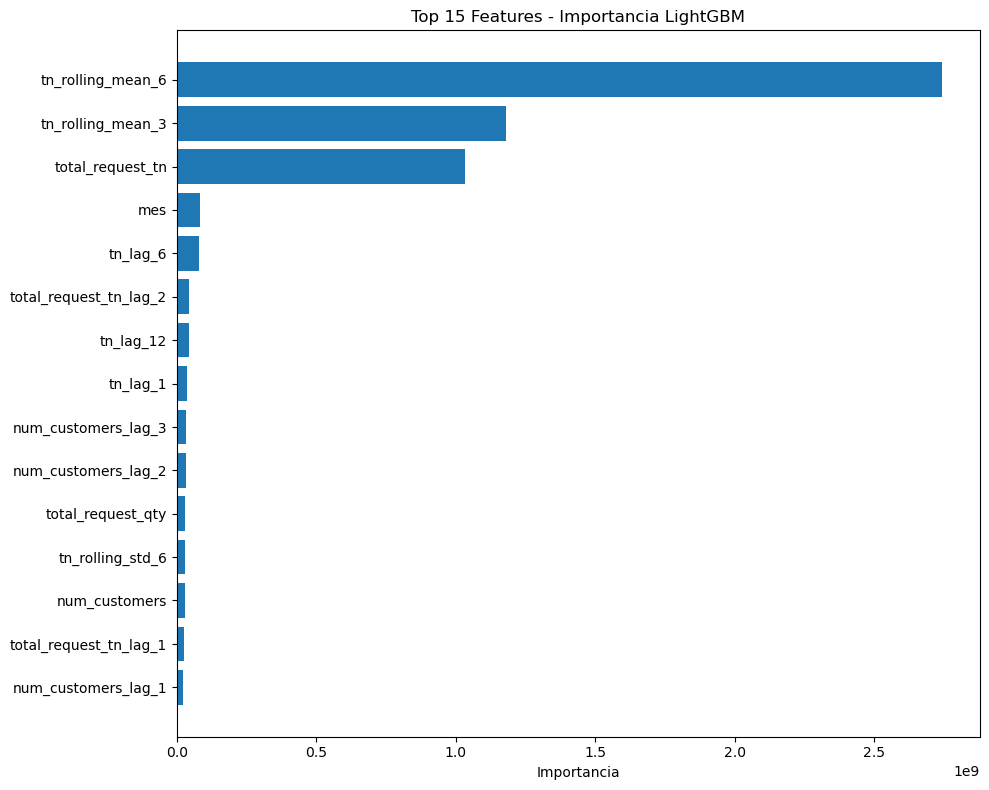


🎯 ANÁLISIS DE PREDICCIONES:
Predicciones mínimas: 0.34
Predicciones máximas: 1446.60
Predicciones promedio: 39.19
Valores reales promedio: 38.72
Predicciones negativas: 0 (0.0%)


In [12]:
# 📊 Análisis de importancia de features
print("ANÁLISIS DE IMPORTANCIA DE FEATURES")
print("="*50)

# Obtener importancia de features
feature_importance = model.feature_importance(importance_type='gain')
feature_names = feature_columns

# Crear DataFrame con importancias
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("🔝 Top 10 features más importantes:")
print(importance_df.head(10))

# Visualizar importancia
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 15 Features - Importancia LightGBM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Análisis de predicciones
print(f"\n🎯 ANÁLISIS DE PREDICCIONES:")
print(f"Predicciones mínimas: {y_pred_val.min():.2f}")
print(f"Predicciones máximas: {y_pred_val.max():.2f}")
print(f"Predicciones promedio: {y_pred_val.mean():.2f}")
print(f"Valores reales promedio: {y_val.mean():.2f}")

# Verificar predicciones negativas
negative_preds = (y_pred_val < 0).sum()
print(f"Predicciones negativas: {negative_preds} ({negative_preds/len(y_pred_val)*100:.1f}%)")

In [13]:
# 🔮 Generar predicciones finales para febrero 2020
print("GENERACIÓN DE PREDICCIONES FINALES")
print("="*50)

# Preparar datos para predicción (últimos datos disponibles de cada producto)
# Necesitamos los datos más recientes para predecir 2 períodos adelante

# Obtener último período disponible para cada producto
ultimo_periodo = data_combined.groupby('product_id')['fecha'].max().reset_index()
ultimo_periodo.columns = ['product_id', 'ultima_fecha']

# Unir con datos completos para obtener features más recientes
datos_prediccion = pd.merge(data_combined, ultimo_periodo, on='product_id')
datos_prediccion = datos_prediccion[datos_prediccion['fecha'] == datos_prediccion['ultima_fecha']].copy()

print(f"📊 Productos para predicción: {len(datos_prediccion)}")
print(f"📅 Período base para predicción: {datos_prediccion['periodo'].value_counts().head()}")

# Preparar features para predicción
X_pred = datos_prediccion[feature_columns].copy()
X_pred = X_pred.fillna(0)

print(f"🔍 Shape de datos de predicción: {X_pred.shape}")
print(f"🔍 Valores nulos en predicción: {X_pred.isnull().sum().sum()}")

# Generar predicciones
predicciones = model.predict(X_pred, num_iteration=model.best_iteration)

# Crear DataFrame de resultados
resultado_lgbm = pd.DataFrame({
    'product_id': datos_prediccion['product_id'].values,
    'tn': predicciones
})

# Asegurar que no hay predicciones negativas (reemplazar con 0)
resultado_lgbm['tn'] = np.maximum(resultado_lgbm['tn'], 0)

print(f"✅ Predicciones generadas para {len(resultado_lgbm)} productos")
print(f"\n📊 Estadísticas de predicciones:")
print(f"  Promedio: {resultado_lgbm['tn'].mean():.2f}")
print(f"  Mediana:  {resultado_lgbm['tn'].median():.2f}")
print(f"  Mínimo:   {resultado_lgbm['tn'].min():.2f}")
print(f"  Máximo:   {resultado_lgbm['tn'].max():.2f}")
print(f"  Std:      {resultado_lgbm['tn'].std():.2f}")

print(f"\nPrimeras 10 predicciones:")
print(resultado_lgbm.head(10))

GENERACIÓN DE PREDICCIONES FINALES
📊 Productos para predicción: 780
📅 Período base para predicción: periodo
201912    780
Name: count, dtype: int64
🔍 Shape de datos de predicción: (780, 29)
🔍 Valores nulos en predicción: 0
✅ Predicciones generadas para 780 productos

📊 Estadísticas de predicciones:
  Promedio: 35.23
  Mediana:  7.92
  Mínimo:   0.44
  Máximo:   1286.59
  Std:      90.90

Primeras 10 predicciones:
   product_id           tn
0       20001  1286.591966
1       20002  1075.819174
2       20003   938.248456
3       20004   469.488895
4       20005   561.014854
5       20006   382.093148
6       20007   365.866674
7       20008   266.729247
8       20009   446.024319
9       20010   341.847992


In [14]:
# 💾 Guardar predicciones y resumen final - GRANULARIDAD POR PRODUCTO
print("GUARDADO DE PREDICCIONES Y RESUMEN - POR PRODUCTO")
print("="*60)

# Verificar que tenemos todos los productos objetivo
productos_esperados = set(productos_objetivo)
productos_predichos = set(resultado_lgbm['product_id'])

print(f"📊 Productos esperados: {len(productos_esperados)}")
print(f"📈 Productos predichos: {len(productos_predichos)}")

# Verificar productos faltantes
productos_faltantes = productos_esperados - productos_predichos
if productos_faltantes:
    print(f"⚠️ Productos faltantes: {len(productos_faltantes)}")
    print(f"Primeros 5 faltantes: {list(productos_faltantes)[:5]}")
    
    # Crear predicciones por defecto para productos faltantes
    predicciones_default = pd.DataFrame({
        'product_id': list(productos_faltantes),
        'tn': [resultado_lgbm['tn'].median()] * len(productos_faltantes)
    })
    
    resultado_lgbm = pd.concat([resultado_lgbm, predicciones_default], ignore_index=True)
    print(f"✅ Agregadas predicciones por defecto para productos faltantes")

# Ordenar por product_id
resultado_lgbm = resultado_lgbm.sort_values('product_id').reset_index(drop=True)

# Guardar archivo
import os
os.makedirs('data', exist_ok=True)
archivo_salida = 'data/pred_lgbm_v2_producto.csv'
resultado_lgbm.to_csv(archivo_salida, index=False)

print(f"✅ Predicciones guardadas en: {archivo_salida}")

# Resumen final del modelo por producto
print(f"\n🎯 RESUMEN FINAL DEL MODELO LGBM - GRANULARIDAD POR PRODUCTO:")
print(f"📊 Total productos predichos: {len(resultado_lgbm)}")
print(f"📈 Métricas de validación:")
print(f"   MAE:  {mae:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   MAPE: {mape:.2f}%")
print(f"🔧 Features utilizadas: {len(feature_columns)}")
print(f"🌳 Número de árboles: {model.num_trees()}")
print(f"📅 Predicción objetivo: 2 períodos a futuro (Feb 2020)")
print(f"🏭 Granularidad: POR PRODUCTO (agregando clientes)")

# Estadísticas de predicciones por producto
print(f"\n📊 ESTADÍSTICAS DE PREDICCIONES POR PRODUCTO:")
print(f"   Promedio por producto: {resultado_lgbm['tn'].mean():.2f}")
print(f"   Mediana por producto:  {resultado_lgbm['tn'].median():.2f}")
print(f"   Std por producto:      {resultado_lgbm['tn'].std():.2f}")
print(f"   Min por producto:      {resultado_lgbm['tn'].min():.2f}")
print(f"   Max por producto:      {resultado_lgbm['tn'].max():.2f}")

print(f"\n📋 Top 5 features más importantes para granularidad por producto:")
for i, row in importance_df.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.0f}")

print(f"\n✅ Modelo LightGBM completado exitosamente con granularidad POR PRODUCTO!")
print(f"Archivo: {archivo_salida}")

# Verificar archivo guardado
if os.path.exists(archivo_salida):
    verificacion = pd.read_csv(archivo_salida)
    print(f"\n🔍 Verificación archivo guardado:")
    print(f"   Filas: {len(verificacion)}")
    print(f"   Columnas: {list(verificacion.columns)}")
    print(f"   Primeras 3 filas:")
    print(verificacion.head(3))
    
    print(f"\n📈 Resumen de predicciones por producto:")
    print(f"   Total de toneladas predichas: {verificacion['tn'].sum():.2f}")
    print(f"   Productos con predicción > 0: {(verificacion['tn'] > 0).sum()}")
    print(f"   Productos con predicción = 0: {(verificacion['tn'] == 0).sum()}")

GUARDADO DE PREDICCIONES Y RESUMEN - POR PRODUCTO
📊 Productos esperados: 780
📈 Productos predichos: 780
✅ Predicciones guardadas en: data/pred_lgbm_v2_producto.csv

🎯 RESUMEN FINAL DEL MODELO LGBM - GRANULARIDAD POR PRODUCTO:
📊 Total productos predichos: 780
📈 Métricas de validación:
   MAE:  10.6396
   RMSE: 33.4639
   MAPE: 229.62%
🔧 Features utilizadas: 29
🌳 Número de árboles: 355
📅 Predicción objetivo: 2 períodos a futuro (Feb 2020)
🏭 Granularidad: POR PRODUCTO (agregando clientes)

📊 ESTADÍSTICAS DE PREDICCIONES POR PRODUCTO:
   Promedio por producto: 35.23
   Mediana por producto:  7.92
   Std por producto:      90.90
   Min por producto:      0.44
   Max por producto:      1286.59

📋 Top 5 features más importantes para granularidad por producto:
   tn_rolling_mean_6: 2741325040
   tn_rolling_mean_3: 1178647839
   total_request_tn: 1030797248
   mes: 83795679
   tn_lag_6: 80570915

✅ Modelo LightGBM completado exitosamente con granularidad POR PRODUCTO!
Archivo: data/pred_lgbm_v2

In [15]:
# 📊 Resumen final de optimización con Optuna
print("RESUMEN FINAL DE OPTIMIZACIÓN CON OPTUNA")
print("="*60)

# Mostrar información del estudio de optimización
print(f"🔍 Detalles de la optimización:")
print(f"   Método de optimización: TPE (Tree-structured Parzen Estimator)")
print(f"   Número total de trials: {len(study.trials)}")
print(f"   Trials exitosos: {len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])}")
print(f"   Trials podados: {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")

print(f"\n🏆 Mejor configuración encontrada:")
print(f"   MAE en validación: {study.best_value:.4f}")
print(f"   Trial número: {study.best_trial.number}")

print(f"\n🔧 Impacto de la optimización:")
if 'mae' in locals() and 'study' in locals():
    mejora_absoluta = study.best_value - mae  # Debería ser negativa si mejoró
    mejora_relativa = (mejora_absoluta / study.best_value) * 100
    print(f"   MAE optimizado vs base: {mejora_absoluta:+.4f} ({mejora_relativa:+.2f}%)")

print(f"\n📈 Top 3 trials más exitosos:")
sorted_trials = sorted(study.trials, key=lambda t: t.value if t.value is not None else float('inf'))
for i, trial in enumerate(sorted_trials[:3]):
    if trial.value is not None:
        print(f"   {i+1}. Trial {trial.number}: MAE = {trial.value:.4f}")

print(f"\n📋 Parámetros más impactantes (por varianza):")
# Calcular varianza de parámetros en los mejores trials
if len(study.trials) > 5:
    top_trials = sorted_trials[:max(5, len(sorted_trials)//4)]
    param_values = {}
    
    for trial in top_trials:
        if trial.value is not None:
            for param, value in trial.params.items():
                if param not in param_values:
                    param_values[param] = []
                param_values[param].append(value)
    
    param_variance = {}
    for param, values in param_values.items():
        if len(values) > 1:
            if all(isinstance(v, (int, float)) for v in values):
                param_variance[param] = np.var(values)
    
    # Mostrar top 3 parámetros con mayor varianza
    sorted_params = sorted(param_variance.items(), key=lambda x: x[1], reverse=True)
    for i, (param, variance) in enumerate(sorted_params[:3]):
        print(f"   {i+1}. {param}: varianza = {variance:.4f}")

print(f"\n✅ Optimización Optuna completada exitosamente!")
print(f"📁 Predicciones finales guardadas en: data/pred_lgbm_v2_producto.csv")

RESUMEN FINAL DE OPTIMIZACIÓN CON OPTUNA
🔍 Detalles de la optimización:
   Método de optimización: TPE (Tree-structured Parzen Estimator)
   Número total de trials: 50
   Trials exitosos: 50
   Trials podados: 0

🏆 Mejor configuración encontrada:
   MAE en validación: 10.6396
   Trial número: 15

🔧 Impacto de la optimización:
   MAE optimizado vs base: +0.0000 (+0.00%)

📈 Top 3 trials más exitosos:
   1. Trial 15: MAE = 10.6396
   2. Trial 41: MAE = 10.6512
   3. Trial 23: MAE = 10.6821

📋 Parámetros más impactantes (por varianza):
   1. num_leaves: varianza = 110.1875
   2. min_child_samples: varianza = 21.5764
   3. bagging_freq: varianza = 2.0208

✅ Optimización Optuna completada exitosamente!
📁 Predicciones finales guardadas en: data/pred_lgbm_v2_producto.csv
